# Linear Regression 

### From Very Basic, Then Intermediate Level, Then Advanced Level

#### The Basics
Basic: Understanding the Linear Regression Model



In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Core Formula
The formula for a simple linear regression model is:

#### f(x) = wx + b



In [ ]:
x_train = np.array([1000, 1500, 2000])  #The size in sq. feet
y_train = np.array([300, 500, 650])   #Price (in $1000s)

Making Predictions
Let's make an initial guess for our parameters. This is what a learning algorithm would do to start.

Let's guess w = 0.2 (meaning each sq. ft. adds $200 to the price).

Let's guess b = 100 (meaning a house has a base price of $100k)

In [5]:
w = 0.2
b = 100

In [11]:
fx_wb = w*x_train[0] + b
print(fx_wb)

300.0


In [12]:
fx_wb = w*x_train[1] + b
print(fx_wb)

400.0


In [13]:
fx_wb = w*x_train[2] + b
print(fx_wb)

500.0


In [19]:
fx_wb = w*x_train + b
print(fx_wb)

[300. 400. 500.]


In [32]:

def compute_model_output(x, w, b):

    m = x_train.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

tmp_f_wb = compute_model_output(x_train, w, b,)
print(tmp_f_wb)

[300. 400. 500.]


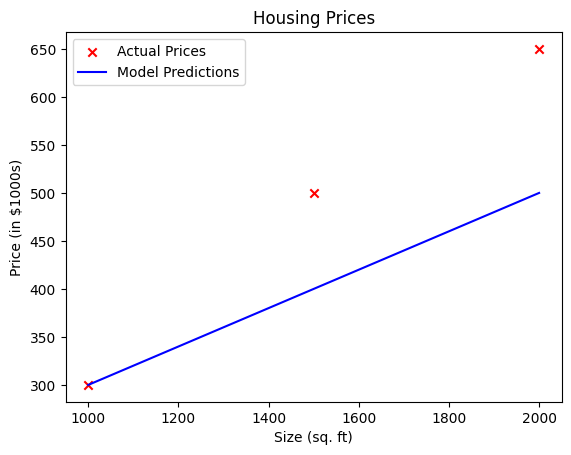

In [22]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Prices')
plt.plot(x_train, fx_wb, c='b', label='Model Predictions')

plt.title("Housing Prices")
plt.ylabel('Price (in $1000s)')
plt.xlabel('Size (sq. ft)')
plt.legend()
plt.show()

### Intermediate: Minimizing Error with a Cost Function and Gradient Descent

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [40]:
def compute_cost(x, y, w, b):
    total_cost = 0
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        fx_wb = w * x[i] + b
        cost = (fx_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    
    total_cost = (1 /(2 * m))*cost_sum
    return total_cost


In [47]:
tmp_cost = compute_cost(x_train, y_train, w , b)

### You don't plot the cost on the same graph as your data. Instead, you plot the cost against the number of iterations of gradient descent. This is called a learning curve.

The purpose of a learning curve is to see if your model is actually learning over time.

----If the cost is decreasing with each iteration, your model is learning!

----If the cost flattens out, it means your model has learned as much as it can (it has converged).

Iteration    0: Cost 7.31e+04  dj_dw: -7.833e+05, dj_db: -4.833e+02   w:  7.833e-02, b: 4.83333e-05
Iteration 1000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.874e+00   w:  3.241e-01, b:-8.64550e-05
Iteration 2000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.874e+00   w:  3.241e-01, b:-3.73810e-04
Iteration 3000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.874e+00   w:  3.241e-01, b:-6.61162e-04
Iteration 4000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-9.48513e-04
Iteration 5000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-1.23586e-03
Iteration 6000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-1.52321e-03
Iteration 7000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-1.81055e-03
Iteration 8000: Cost 1.29e+02  dj_dw: -1.784e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-2.09790e-03
Iteration 9000: Cost 1.29e+02  dj_dw: -1.783e-03, dj_db:  2.873e+00   w:  3.241e-01, b:-2.38524e-03


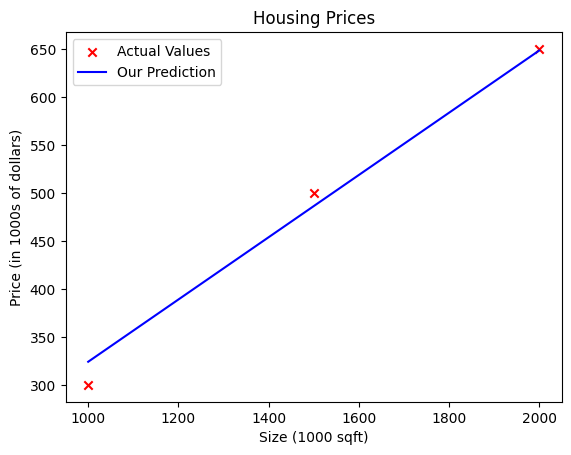

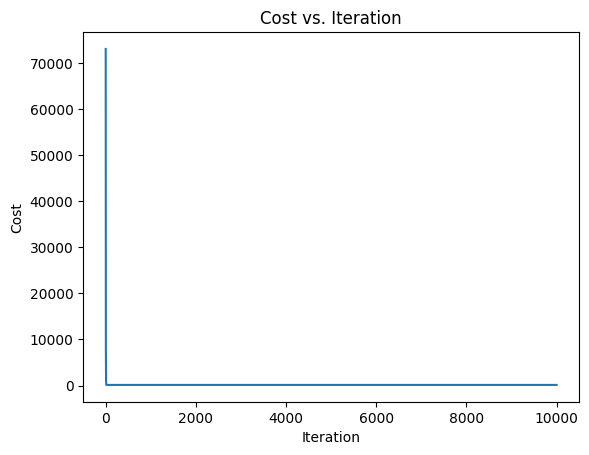

In [48]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define the Training Data ---
# This is the same small dataset we used in our examples.
x_train = np.array([1000, 1500, 2000]) # Feature: Size in sq. ft.
y_train = np.array([300, 500, 650])    # Target: Price in $1000s

# --- 2. Cost Function Implementation ---
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray): Shape (m,) Input to the model (features)
      y (ndarray): Shape (m,) Label (actual values)
      w, b (scalar): Parameters of the model
    
    Returns
      total_cost (float): The cost of using w,b as parameters for linear regression
                          to fit the data points in x and y
    """
    m = x.shape[0] 
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

# --- 3. Gradient Calculation Implementation ---
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression.
    
    Args:
      x (ndarray): Shape (m,) Input to the model (features)
      y (ndarray): Shape (m,) Label (actual values)
      w, b (scalar): Parameters of the model
      
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

# --- 4. Gradient Descent Implementation ---
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters
    gradient steps with learning rate alpha.
    
    Args:
      x (ndarray): Shape (m,) Input to the model (features)
      y (ndarray): Shape (m,) Label (actual values)
      w_in, b_in (scalar): Initial values of model parameters
      alpha (float):        Learning rate
      num_iters (int):      Number of iterations to run gradient descent
      cost_function:        function to call to produce cost
      gradient_function:    function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List):     History of cost values
      p_history (list):     History of parameters [w,b] 
      """
    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
            
        # Print cost every 10 iterations
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

# --- 5. Run the Gradient Descent Algorithm ---

# Initialize parameters
w_init = 0
b_init = 0

# Gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-7 # A small learning rate

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

print(f"\n(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# --- 6. Plot the Results ---

# Plot the final regression line
plt.figure(1)
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.plot(x_train, w_final * x_train + b_final, c='b',label='Our Prediction')
plt.legend()
plt.show()

# Plot the learning curve (cost vs. iterations)
plt.figure(2)
plt.plot(J_hist)
plt.title("Cost vs. Iteration")
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()
